## Soccer Fever Challenge Hackathon

### Importing required libraries

In [49]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [50]:
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, timedelta

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.feature_selection import RFECV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

### Importing dataset

In [52]:
train_df = pd.read_csv('train.csv')
train_df

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,Outcome
0,2019,01/03/19,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,1.75,0.84,45.90,22.10,1.00,0.00,1.39,0.26,2.05,0.54,1.05,0.00,1
1,2019,01/03/19,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,1.22,1.89,25.60,63.40,0.00,4.00,0.57,2.76,0.80,1.50,0.00,3.26,0
2,2019,01/03/19,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,2.58,0.62,77.10,28.80,3.00,0.00,0.49,0.45,1.05,0.75,3.15,0.00,1
3,2019,01/03/19,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,1.10,1.79,35.80,58.90,0.00,1.00,1.12,0.97,1.51,0.94,0.00,1.05,0
4,2019,01/03/19,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,1.57,1.24,26.20,21.30,2.00,2.00,2.77,3.17,1.05,2.08,2.10,2.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7438,2021,12/12/21,1846,German 2. Bundesliga,Karlsruher SC,1. FC Heidenheim 1846,34.05,33.76,1.39,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7439,2021,12/12/21,1846,German 2. Bundesliga,SC Paderborn,SV Darmstadt 98,36.73,36.11,1.67,1.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7440,2021,14/12/21,1983,South African ABSA Premier League,Moroka Swallows,Orlando Pirates,12.97,23.59,1.05,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7441,2021,14/12/21,1983,South African ABSA Premier League,Tshakhuma Tsha Madzivhandila,Black Aces,11.76,18.07,1.22,1.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [53]:
test_df = pd.read_csv('test.csv')
test_df

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2021,14/12/21,2411,BPL,Arsenal,West Ham United,79.65,74.06,1.67,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,14/12/21,2411,BPL,Brighton and Hove Albion,Wolverhampton,74.19,71.14,1.35,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,14/12/21,2411,BPL,Norwich City,Aston Villa,60.67,71.45,1.18,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,14/12/21,2411,BPL,Leicester City,Tottenham Hotspur,76.88,79.06,1.52,1.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,14/12/21,2411,BPL,Brentford,Manchester United,63.53,85.58,0.95,1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,2021,29/05/22,1871,Spanish Segunda Division,Leganes,Almeria,41.51,48.12,1.40,1.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,2021,29/05/22,1871,Spanish Segunda Division,AD Alcorcon,Eibar,26.77,33.53,1.17,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,2021,29/05/22,1871,Spanish Segunda Division,Mirandes,Fuenlabrada,26.62,28.65,1.31,1.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,2021,29/05/22,1871,Spanish Segunda Division,Sporting Gijón,Las Palmas,33.74,30.32,1.33,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Getting information from dataset

In [54]:
def details(df):
    sum_null_values = df.isnull().sum()
    percent_null_values = 100* (sum_null_values/len(df))
    data_type = df.dtypes
    unique_values = df.nunique()

    table = pd.concat([sum_null_values,percent_null_values,data_type,unique_values], axis=1)
    table_col = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values', 2 : 'Data_Type', 3: 'Unique values'})
    return table_col

In [55]:
details(train_df)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
season,0,0.00,int64,3
date,0,0.00,object,424
league_id,0,0.00,int64,39
league,0,0.00,object,39
Team 1,0,0.00,object,657
Team2,0,0.00,object,657
SPI1,0,0.00,float64,2516
SPI2,0,0.00,float64,2514
proj_score1,0,0.00,float64,248
proj_score2,0,0.00,float64,242


In [56]:
details(test_df)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
season,0,0.00,int64,1
date,0,0.00,object,115
league_id,0,0.00,int64,24
league,0,0.00,object,24
Team 1,0,0.00,object,426
Team2,0,0.00,object,426
SPI1,0,0.00,float64,412
SPI2,0,0.00,float64,412
proj_score1,0,0.00,float64,218
proj_score2,0,0.00,float64,215


#### <font color=green> Since we have lot of null values, let's delete unwanted columns

In [57]:
df_percent_null = train_df.isnull().sum() / len(train_df)
df_column_del = df_percent_null[df_percent_null > 0.50].index
train_df.drop(df_column_del, axis=1, inplace=True)
train_df.shape

(7443, 11)

In [58]:
df_percent_null = test_df.isnull().sum() / len(test_df)
df_column_del = df_percent_null[df_percent_null > 0.50].index
test_df.drop(df_column_del, axis=1, inplace=True)
test_df.shape

(4008, 10)

### Balance of Target column

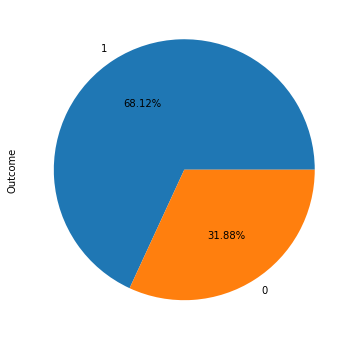

In [59]:
train_df.Outcome.value_counts().plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.show()

### Visualizing certain aspects

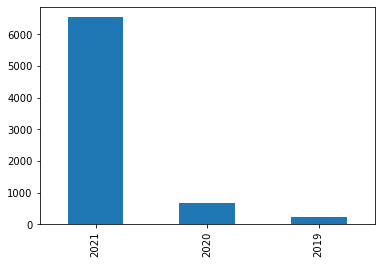

In [60]:
train_df.season.value_counts().plot.bar()
plt.show()

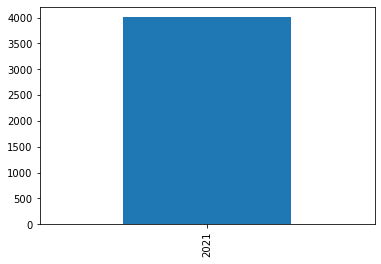

In [61]:
test_df.season.value_counts().plot.bar()
plt.show()

In [62]:
train_df["date"]= pd.to_datetime(train_df["date"])
test_df["date"]= pd.to_datetime(test_df["date"])
details(train_df)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
season,0,0.00,int64,3
date,0,0.00,datetime64[ns],424
league_id,0,0.00,int64,39
league,0,0.00,object,39
Team 1,0,0.00,object,657
Team2,0,0.00,object,657
SPI1,0,0.00,float64,2516
SPI2,0,0.00,float64,2514
proj_score1,0,0.00,float64,248
proj_score2,0,0.00,float64,242


In [63]:
details(test_df)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
season,0,0.00,int64,1
date,0,0.00,datetime64[ns],115
league_id,0,0.00,int64,24
league,0,0.00,object,24
Team 1,0,0.00,object,426
Team2,0,0.00,object,426
SPI1,0,0.00,float64,412
SPI2,0,0.00,float64,412
proj_score1,0,0.00,float64,218
proj_score2,0,0.00,float64,215


### Categorical columns

In [64]:
cols_obj_train = train_df.select_dtypes('object').columns
train_df[cols_obj_train]

,league,Team 1,Team2
0,Chinese Super League,Shandong Luneng,Guizhou Renhe
1,Chinese Super League,Shanghai Greenland,Shanghai SIPG
2,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian
3,Chinese Super League,Wuhan Zall,Beijing Guoan
4,Chinese Super League,Chongqing Lifan,Guangzhou RF
...,...,...,...
7438,German 2. Bundesliga,Karlsruher SC,1. FC Heidenheim 1846
7439,German 2. Bundesliga,SC Paderborn,SV Darmstadt 98
7440,South African ABSA Premier League,Moroka Swallows,Orlando Pirates
7441,South African ABSA Premier League,Tshakhuma Tsha Madzivhandila,Black Aces


### Numerical columns

In [65]:
cols_num_train = train_df.select_dtypes('number').columns
train_df[cols_num_train]

,season,league_id,SPI1,SPI2,proj_score1,proj_score2,Outcome
0,2019,1979,48.22,37.83,1.75,0.84,1
1,2019,1979,39.81,60.08,1.22,1.89,0
2,2019,1979,65.59,39.99,2.58,0.62,1
3,2019,1979,32.25,54.82,1.10,1.79,0
4,2019,1979,38.24,40.45,1.57,1.24,1
...,...,...,...,...,...,...,...
7438,2021,1846,34.05,33.76,1.39,1.19,1
7439,2021,1846,36.73,36.11,1.67,1.44,1
7440,2021,1983,12.97,23.59,1.05,1.50,0
7441,2021,1983,11.76,18.07,1.22,1.46,0


In [66]:
train_df

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,Outcome
0,2019,2019-01-03,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,1.75,0.84,1
1,2019,2019-01-03,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,1.22,1.89,0
2,2019,2019-01-03,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,2.58,0.62,1
3,2019,2019-01-03,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,1.10,1.79,0
4,2019,2019-01-03,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,1.57,1.24,1
...,...,...,...,...,...,...,...,...,...,...,...
7438,2021,2021-12-12,1846,German 2. Bundesliga,Karlsruher SC,1. FC Heidenheim 1846,34.05,33.76,1.39,1.19,1
7439,2021,2021-12-12,1846,German 2. Bundesliga,SC Paderborn,SV Darmstadt 98,36.73,36.11,1.67,1.44,1
7440,2021,2021-12-14,1983,South African ABSA Premier League,Moroka Swallows,Orlando Pirates,12.97,23.59,1.05,1.50,0
7441,2021,2021-12-14,1983,South African ABSA Premier League,Tshakhuma Tsha Madzivhandila,Black Aces,11.76,18.07,1.22,1.46,0


### Visualizing certain aspects of numerical column

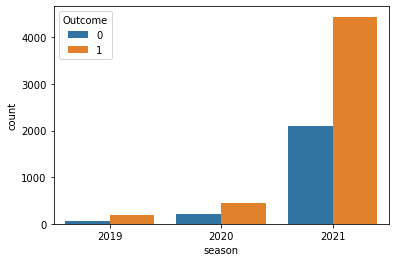

In [67]:
sns.countplot(x="season", hue='Outcome', data=train_df)
plt.show()

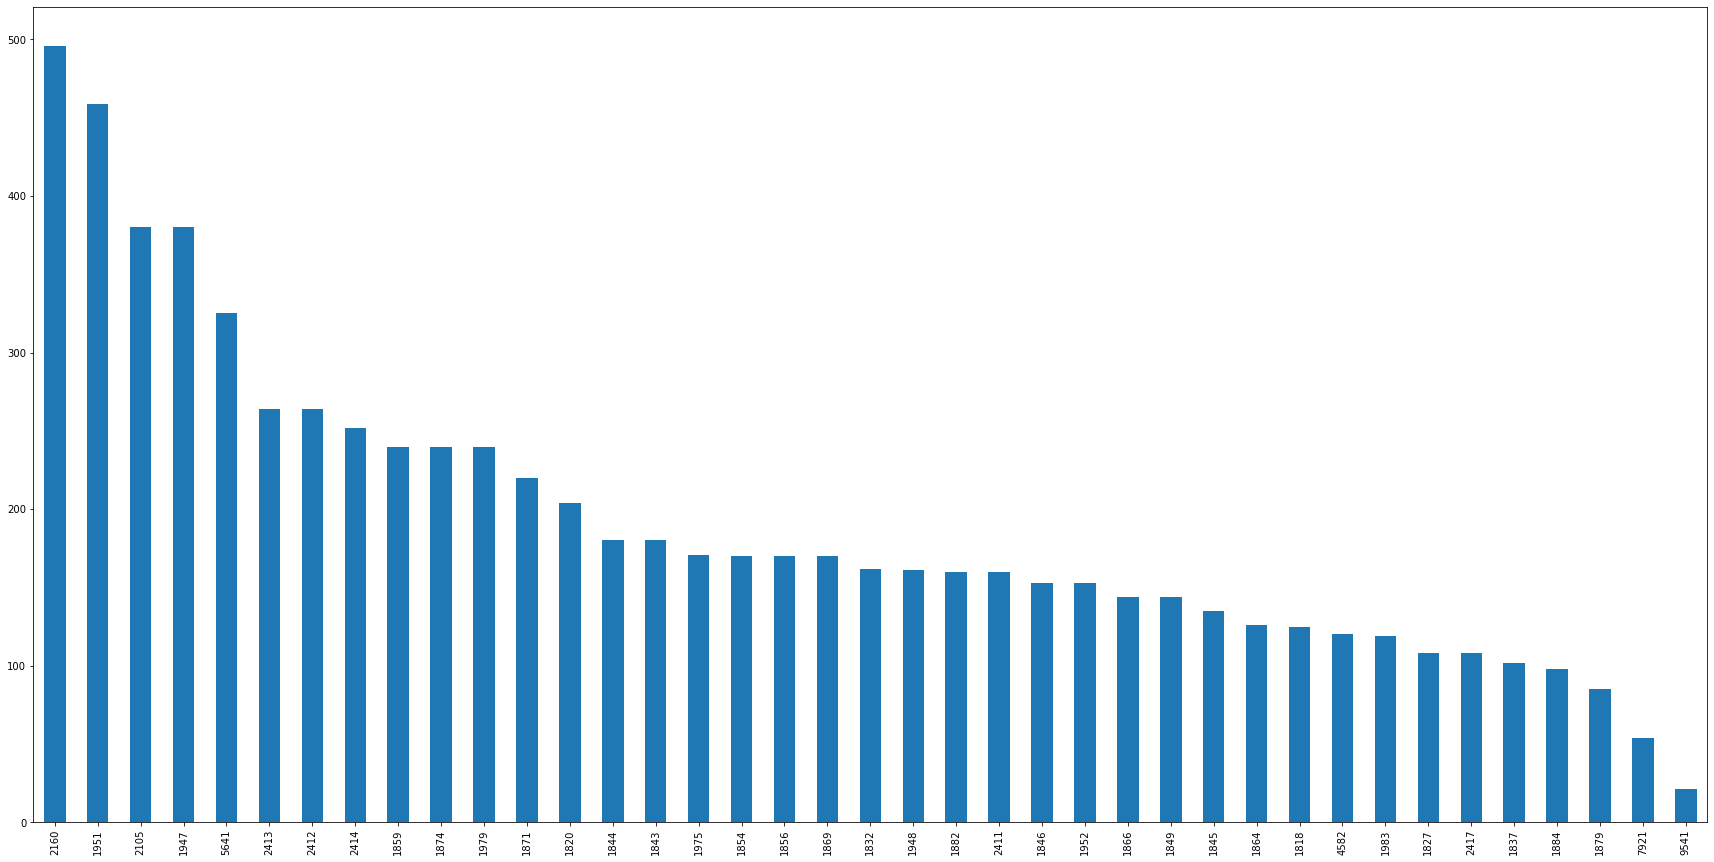

In [68]:
train_df.league_id.value_counts().plot.bar(figsize=(30,15))
plt.show()

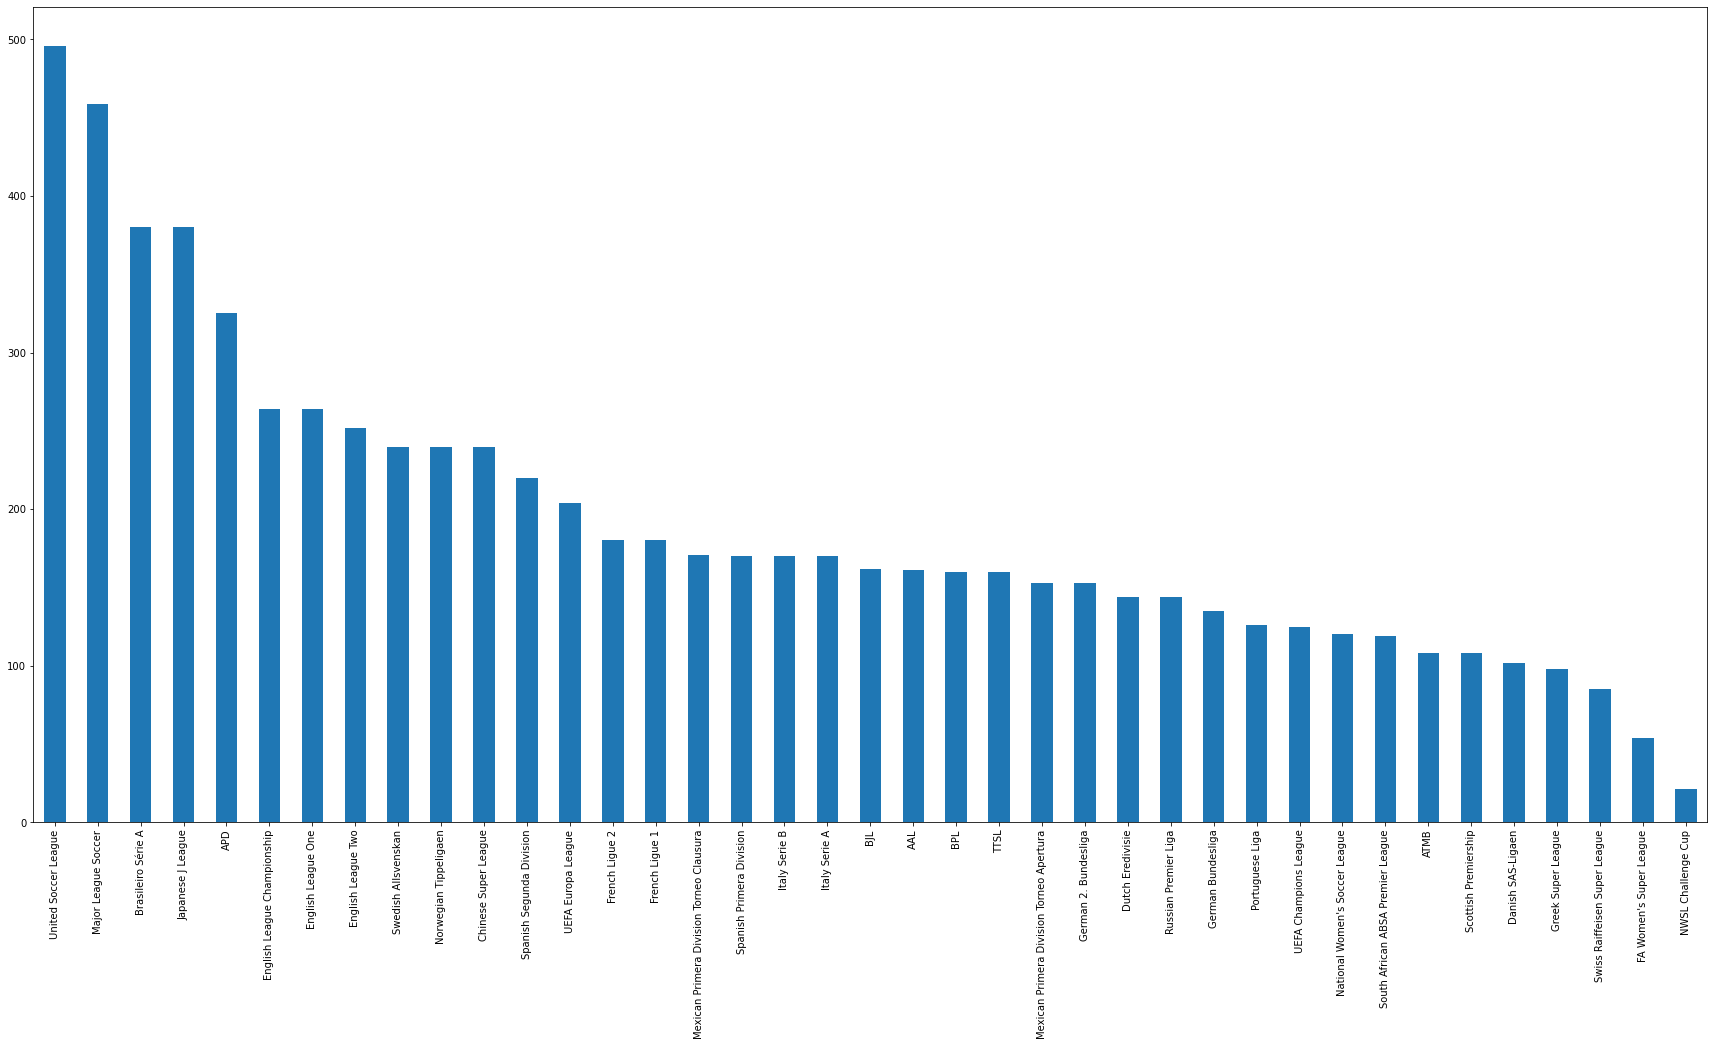

In [69]:
train_df.league.value_counts().plot.bar(figsize=(30,15))
plt.show()

### Visualizing continuous columns

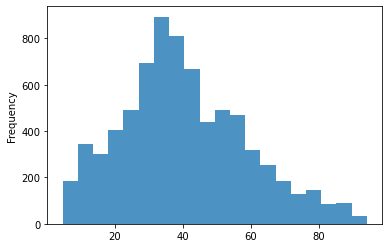

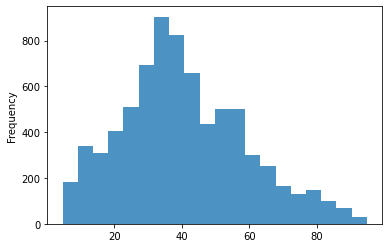

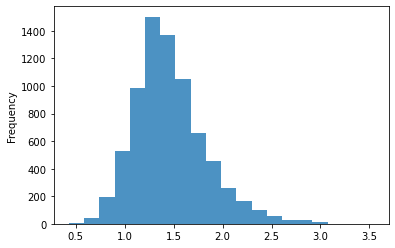

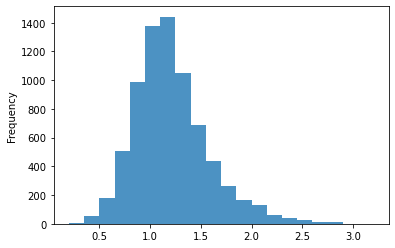

In [70]:
cols = ['SPI1','SPI2','proj_score1','proj_score2']
for i in cols:
    train_df[i].plot.hist(bins=20, alpha=0.8)
    plt.show()

### Train-Test-Validation split

In [71]:
X = train_df.drop(['Outcome'], 1)
y = train_df['Outcome']
X_test = test_df.copy()
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=23)

### Getting numerical columns without certain non value adding columns

In [72]:
cols_num_X_train = [feature for feature in X_train.columns if X_train[feature].dtypes != 'object' and feature not in ['season']+['date']+['league_id']]
X_train[cols_num_X_train]

,SPI1,SPI2,proj_score1,proj_score2
2960,34.39,39.60,1.43,1.45
5896,78.21,70.90,1.59,0.90
5234,33.03,41.63,1.14,1.30
1729,10.23,20.14,1.11,1.56
5216,28.85,55.21,1.11,2.05
...,...,...,...,...
2998,60.32,77.11,0.99,1.75
1993,70.81,54.68,1.95,0.70
1064,9.13,12.65,1.32,1.35
4838,8.69,20.85,1.30,1.71


In [73]:
cols_num_X_val = [feature for feature in X_val.columns if X_val[feature].dtypes != 'object' and feature not in ['season']+['date']+['league_id']]
X_val[cols_num_X_val]

,SPI1,SPI2,proj_score1,proj_score2
2148,51.93,70.73,0.97,1.66
54,58.00,44.08,2.04,0.83
1447,19.61,25.77,1.29,1.21
4213,9.75,9.57,1.75,1.39
6059,11.20,18.07,1.09,1.22
...,...,...,...,...
1061,13.58,20.93,1.23,1.41
4981,43.20,41.65,1.39,1.12
2019,38.90,40.69,1.30,1.16
2952,84.94,59.11,2.18,0.49


In [74]:
cols_num_X_test = [feature for feature in X_test.columns if X_test[feature].dtypes != 'object' and feature not in ['season']+['date']+['league_id']]
X_test[cols_num_X_test]

,SPI1,SPI2,proj_score1,proj_score2
0,79.65,74.06,1.67,1.19
1,74.19,71.14,1.35,0.98
2,60.67,71.45,1.18,1.49
3,76.88,79.06,1.52,1.44
4,63.53,85.58,0.95,1.92
...,...,...,...,...
4003,41.51,48.12,1.40,1.39
4004,26.77,33.53,1.17,1.18
4005,26.62,28.65,1.31,1.14
4006,33.74,30.32,1.33,0.87


### Heatmap

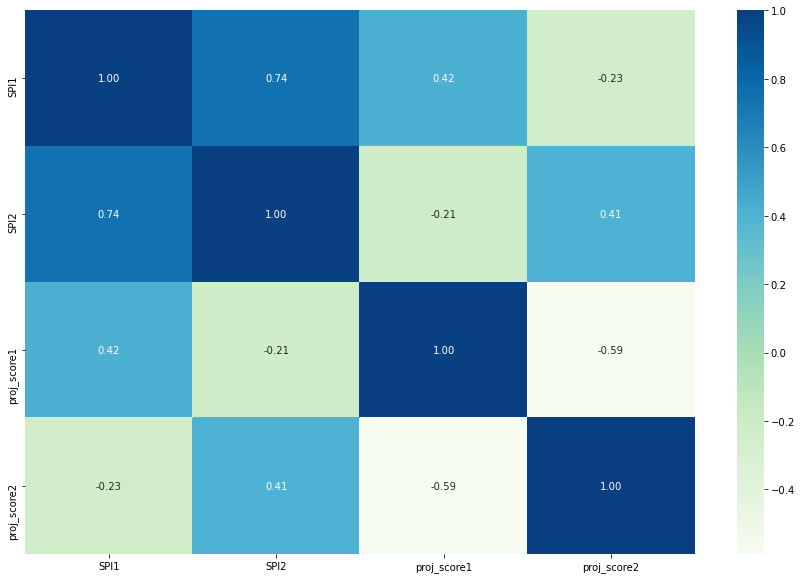

In [75]:
plt.figure(figsize = (15,10))
sns.heatmap(X_train[cols_num_X_train].corr(),annot = True, cmap="GnBu",fmt='.2f')
plt.show()

#### <font color=green> No columns are highly correlated

### Running power transformer for scaling and converting data to normal distribution

In [76]:
pt = PowerTransformer(copy=False)
pt.fit_transform(X_train[cols_num_X_train])
pt.transform(X_val[cols_num_X_val])
pt.transform(X_test[cols_num_X_test])

array([[ 1.90072262,  1.6566556 ,  0.66964473,  0.08150037],
       [ 1.67555707,  1.53342299, -0.20846993, -0.56138982],
       [ 1.08702711,  1.54659997, -0.75976666,  0.84992833],
       ...,
       [-0.7034736 , -0.58355567, -0.3321681 , -0.0626379 ],
       [-0.27554914, -0.48305748, -0.26988237, -0.94220426],
       [-0.51339532, -0.48722599, -0.11794617,  0.08150037]])

In [77]:
model_list = list()
#AUC curve
AUCROC_train = list()
AUCROC_val = list()
#Precision
Precision_train = list()
Precision_val = list()
#Recall
Recall_train = list()
Recall_val = list()
#Accuracy
Acc_train = list()
Acc_val = list()
#Logloss
LogLoss_train = list()
LogLoss_val = list()

### Running machine learning algorithms

In [78]:
model_LR = LogisticRegression()
params_LR = {'C':np.logspace(-1, 5, 10), 'class_weight':[None,'balanced'], 'penalty':['l1','l2']}
model_DT = DecisionTreeClassifier(random_state=23)
params_DT = {
    'max_depth': [10, 20, 50, 100, 200],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split' : [10, 20, 50, 100, 200],
    'criterion': ["gini", "entropy"]
}
model_RF = RandomForestClassifier(oob_score = True, random_state=23)
params_RF = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [10, 20, 50, 100, 200],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split' : [10, 20, 50, 100, 200],
    'criterion': ["gini", "entropy"]
}

### Computing roc_score, precision, recall, logloss, accuracy

In [79]:
def model_fit(model, X_train, y_train, X_val, y_val, algo=None):
    
    model_LR.fit(X_train, y_train)
    
    y_train_prob = model_LR.predict_proba(X_train)
    y_train_pred = model_LR.predict(X_train)
    y_val_prob = model_LR.predict_proba(X_val)
    y_val_pred = model_LR.predict(X_val)
        
    matrix_train = confusion_matrix(y_train, y_train_pred)
    matrix_val = confusion_matrix(y_val, y_val_pred)
    report_train = classification_report(y_train, y_train_pred)
    report_val = classification_report(y_val, y_val_pred)
    auc_train = roc_auc_score(y_train, y_train_prob[:,1])
    auc_val = roc_auc_score(y_val, y_val_prob[:,1])
    logloss_train = log_loss(y_train, y_train_prob[:,1])
    logloss_val = log_loss(y_val, y_val_prob[:,1])
        
    print('Confusion Matrix for train')
    print('='*60)
    print(matrix_train,"\n")
    print('Confusion Matrix for val')
    print('='*60)
    print(matrix_val,"\n")
    print('Classification Report for train')
    print('='*60)
    print(report_train,"\n")
    print('Classification Report for val')
    print('='*60)
    print(report_val,"\n")
    print('AUC-ROC for train')
    print('='*60)
    print(auc_train,'\n')
    print('AUC-ROC for val')
    print('='*60)
    print(auc_val,'\n')
    print('Roc-Auc-Curve for Train set')
    print('='*60)
    print(plot_roc_curve(model_LR, X_train, y_train),'\n')
    print('Roc-Auc-Curve for Val set')
    print('='*60)
    print(plot_roc_curve(model_LR, X_val, y_val),'\n')
    print('Log-Loss for Train set')
    print('='*60)
    print(logloss_train,'\n')
    print('Log-Loss for Val set')
    print('='*60)
    print(logloss_val,'\n')
    
    model_list.append(algo)
    AUCROC_train.append(auc_train)
    AUCROC_val.append(auc_val)
    Precision_train.append(precision_score(y_train, y_train_pred))
    Precision_val.append(precision_score(y_val, y_val_pred))
    Recall_train.append(recall_score(y_train, y_train_pred)) 
    Recall_val.append(recall_score(y_val, y_val_pred))
    Acc_train.append(accuracy_score(y_train, y_train_pred))
    Acc_val.append(accuracy_score(y_val, y_val_pred))
    LogLoss_train.append(logloss_train)
    LogLoss_val.append(logloss_val)

In [80]:
def model_fit_evaluation(model, params, X_train, y_train, X_val, y_val, algo=None):
    
    rcv = RandomizedSearchCV(model, params, cv=5, scoring='neg_log_loss', n_jobs=-1, verbose=1, random_state=23)
    rcv.fit(X_train, y_train)
    
    rcv_best = rcv.best_estimator_
    print('\n')
    print('best estimator : ', rcv_best)
    print('best parameters: ', rcv.best_params_)
    print('best score: ', rcv.best_score_)
    print('\n')

    y_train_prob = rcv_best.predict_proba(X_train)
    y_train_pred = rcv_best.predict(X_train)
    y_val_prob = rcv_best.predict_proba(X_val)
    y_val_pred = rcv_best.predict(X_val)
    
    matrix_train = confusion_matrix(y_train, y_train_pred)
    matrix_val = confusion_matrix(y_val, y_val_pred)
    report_train = classification_report(y_train, y_train_pred)
    report_val = classification_report(y_val, y_val_pred)
    auc_train = roc_auc_score(y_train, y_train_prob[:,1])
    auc_val = roc_auc_score(y_val, y_val_prob[:,1])
    logloss_train = log_loss(y_train, y_train_prob[:,1])
    logloss_val = log_loss(y_val, y_val_prob[:,1])
    
    print('Confusion Matrix for train')
    print('='*60)
    print(matrix_train,"\n")
    print('Confusion Matrix for val')
    print('='*60)
    print(matrix_val,"\n")
    print('Classification Report for train')
    print('='*60)
    print(report_train,"\n")
    print('Classification Report for val')
    print('='*60)
    print(report_val,"\n")
    print('AUC-ROC for train')
    print('='*60)
    print(auc_train,'\n')
    print('AUC-ROC for val')
    print('='*60)
    print(auc_val,'\n')
    print('Roc-Auc-Curve for Train set')
    print('='*60)
    print(plot_roc_curve(rcv_best, X_train, y_train),'\n')
    print('Roc-Auc-Curve for Val set')
    print('='*60)
    print(plot_roc_curve(rcv_best, X_val, y_val),'\n')
    print('Log-Loss for Train set')
    print('='*60)
    print(logloss_train,'\n')
    print('Log-Loss for Val set')
    print('='*60)
    print(logloss_val,'\n')
    
    model_list.append(algo)
    AUCROC_train.append(auc_train)
    AUCROC_val.append(auc_val)
    Precision_train.append(precision_score(y_train, y_train_pred))
    Precision_val.append(precision_score(y_val, y_val_pred))
    Recall_train.append(recall_score(y_train, y_train_pred)) 
    Recall_val.append(recall_score(y_val, y_val_pred))
    Acc_train.append(accuracy_score(y_train, y_train_pred))
    Acc_val.append(accuracy_score(y_val, y_val_pred))
    LogLoss_train.append(logloss_train)
    LogLoss_val.append(logloss_val)

### Logistic Regression without Hyperparameter tuning

Confusion Matrix for train
[[1588   85]
 [  71 3466]] 

Confusion Matrix for val
[[ 665   35]
 [  23 1510]] 

Classification Report for train
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1673
           1       0.98      0.98      0.98      3537

    accuracy                           0.97      5210
   macro avg       0.97      0.96      0.97      5210
weighted avg       0.97      0.97      0.97      5210
 

Classification Report for val
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       700
           1       0.98      0.98      0.98      1533

    accuracy                           0.97      2233
   macro avg       0.97      0.97      0.97      2233
weighted avg       0.97      0.97      0.97      2233
 

AUC-ROC for train
0.9964908580642076 

AUC-ROC for val
0.996291119187401 

Roc-Auc-Curve for Train set

Roc-Auc-Curve for Val set

Log-Loss for Train set
0.08119675923949

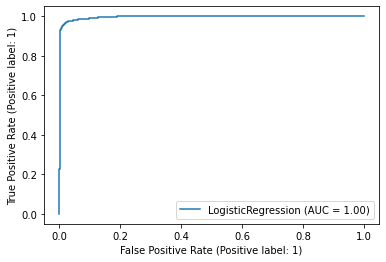

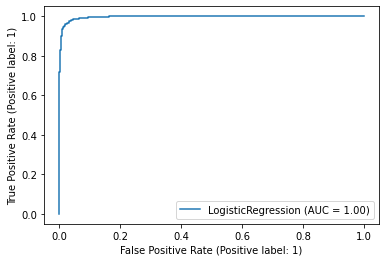

In [81]:
model_fit(model_LR, X_train[cols_num_X_train], y_train, X_val[cols_num_X_val], y_val, algo='Logistic Regression without Hyperparameters')

### Logistic Regression with Hyperparameter tuning

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  LogisticRegression(C=21544.346900318822)
best parameters:  {'penalty': 'l2', 'class_weight': None, 'C': 21544.346900318822}
best score:  -0.029102879355619903


Confusion Matrix for train
[[1667    6]
 [  11 3526]] 

Confusion Matrix for val
[[ 693    7]
 [   5 1528]] 

Classification Report for train
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1673
           1       1.00      1.00      1.00      3537

    accuracy                           1.00      5210
   macro avg       1.00      1.00      1.00      5210
weighted avg       1.00      1.00      1.00      5210
 

Classification Report for val
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       700
           1       1.00      1.00      1.00      1533

    accuracy                           0.99      2233
   macro avg       0.99      0.99      

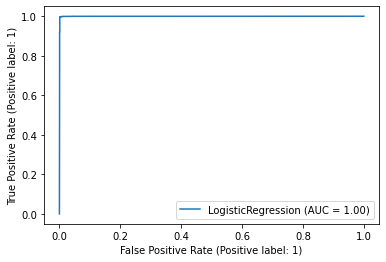

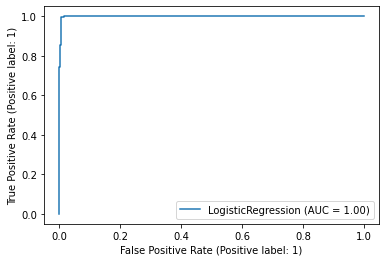

In [82]:
model_fit_evaluation(model_LR, params_LR, X_train[cols_num_X_train], y_train, X_val[cols_num_X_val], y_val, algo='Logistic Regression with Hyperparameter tuning')

### Decision Tree without Hyperparameter tuning

Confusion Matrix for train
[[1588   85]
 [  71 3466]] 

Confusion Matrix for val
[[ 665   35]
 [  23 1510]] 

Classification Report for train
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1673
           1       0.98      0.98      0.98      3537

    accuracy                           0.97      5210
   macro avg       0.97      0.96      0.97      5210
weighted avg       0.97      0.97      0.97      5210
 

Classification Report for val
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       700
           1       0.98      0.98      0.98      1533

    accuracy                           0.97      2233
   macro avg       0.97      0.97      0.97      2233
weighted avg       0.97      0.97      0.97      2233
 

AUC-ROC for train
0.9964908580642076 

AUC-ROC for val
0.996291119187401 

Roc-Auc-Curve for Train set

Roc-Auc-Curve for Val set

Log-Loss for Train set
0.08119675923949

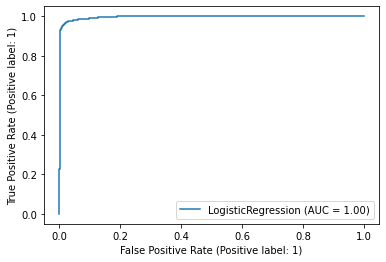

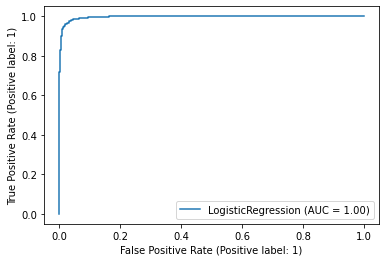

In [83]:
model_fit(model_DT, X_train[cols_num_X_train], y_train, X_val[cols_num_X_val], y_val, algo='Decision Tree without Hyperparameters')

### Decision Tree with Hyperparameter tuning

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=200,
                       random_state=23)
best parameters:  {'min_samples_split': 200, 'min_samples_leaf': 50, 'max_depth': 10, 'criterion': 'gini'}
best score:  -0.14781108404574156


Confusion Matrix for train
[[1600   73]
 [  99 3438]] 

Confusion Matrix for val
[[ 670   30]
 [  44 1489]] 

Classification Report for train
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1673
           1       0.98      0.97      0.98      3537

    accuracy                           0.97      5210
   macro avg       0.96      0.96      0.96      5210
weighted avg       0.97      0.97      0.97      5210
 

Classification Report for val
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       700
           1       0.98      0.97      0.98  

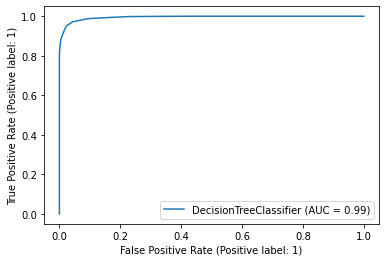

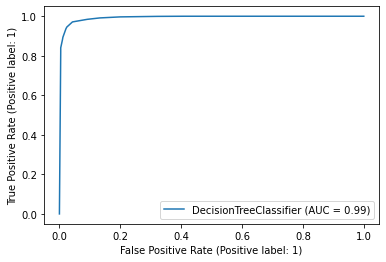

In [84]:
model_fit_evaluation(model_DT, params_DT, X_train[cols_num_X_train], y_train, X_val[cols_num_X_val], y_val, algo='Decision Tree with Hyperparameter tuning')

### Random Forest without Hyperparameter tuning

Confusion Matrix for train
[[1588   85]
 [  71 3466]] 

Confusion Matrix for val
[[ 665   35]
 [  23 1510]] 

Classification Report for train
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1673
           1       0.98      0.98      0.98      3537

    accuracy                           0.97      5210
   macro avg       0.97      0.96      0.97      5210
weighted avg       0.97      0.97      0.97      5210
 

Classification Report for val
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       700
           1       0.98      0.98      0.98      1533

    accuracy                           0.97      2233
   macro avg       0.97      0.97      0.97      2233
weighted avg       0.97      0.97      0.97      2233
 

AUC-ROC for train
0.9964908580642076 

AUC-ROC for val
0.996291119187401 

Roc-Auc-Curve for Train set

Roc-Auc-Curve for Val set

Log-Loss for Train set
0.08119675923949

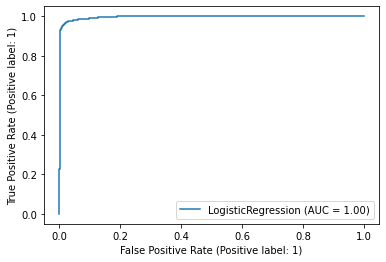

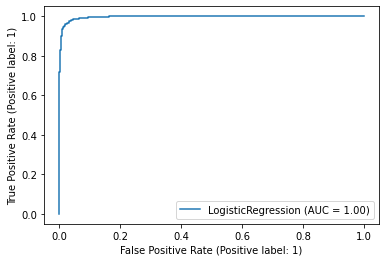

In [85]:
model_fit(model_RF, X_train[cols_num_X_train], y_train, X_val[cols_num_X_val], y_val, algo='Random Forest without Hyperparameters')

### Random Forest with Hyperparameter tuning

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=20,
                       min_samples_split=20, n_estimators=10, oob_score=True,
                       random_state=23)
best parameters:  {'n_estimators': 10, 'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': 100, 'criterion': 'entropy'}
best score:  -0.07742340976573821


Confusion Matrix for train
[[1641   32]
 [  30 3507]] 

Confusion Matrix for val
[[ 683   17]
 [  17 1516]] 

Classification Report for train
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1673
           1       0.99      0.99      0.99      3537

    accuracy                           0.99      5210
   macro avg       0.99      0.99      0.99      5210
weighted avg       0.99      0.99      0.99      5210
 

Classification Report for val
              precision    recall  f1-score   support


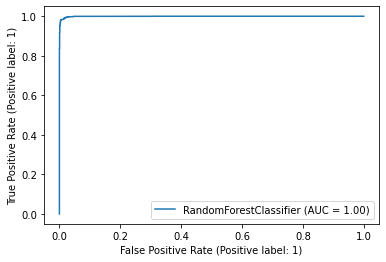

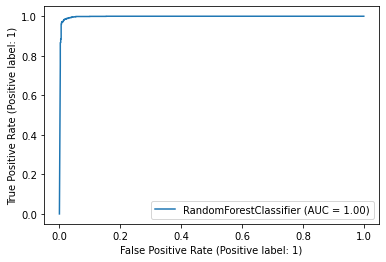

In [86]:
model_fit_evaluation(model_RF, params_RF, X_train[cols_num_X_train], y_train, X_val[cols_num_X_val], y_val, algo='Random Forest with Hyperparameter tuning')

### Evaluating the scores

In [87]:
eval_df = pd.DataFrame({'model': model_list, 'train_AUC': AUCROC_train, 'val_AUC': AUCROC_val, 'train_precision': Precision_train, 'val_precision': Precision_val, 'train_recall': Recall_train, 'val_recall': Recall_val, 'train_accu': Acc_train, 'val_accu': Acc_val, 'logloss_train': LogLoss_train, 'logloss_val': LogLoss_val})
eval_df

,model,train_AUC,val_AUC,train_precision,val_precision,train_recall,val_recall,train_accu,val_accu,logloss_train,logloss_val
0,Logistic Regression without Hyperparameters,1.00,1.00,0.98,0.98,0.98,0.98,0.97,0.97,0.08,0.08
1,Logistic Regression with Hyperparameter tuning,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.03,0.04
2,Decision Tree without Hyperparameters,1.00,1.00,0.98,0.98,0.98,0.98,0.97,0.97,0.08,0.08
3,Decision Tree with Hyperparameter tuning,0.99,0.99,0.98,0.98,0.97,0.97,0.97,0.97,0.08,0.13
4,Random Forest without Hyperparameters,1.00,1.00,0.98,0.98,0.98,0.98,0.97,0.97,0.08,0.08
5,Random Forest with Hyperparameter tuning,1.00,1.00,0.99,0.99,0.99,0.99,0.99,0.98,0.05,0.08


#### <font color=green> Since the log loss is less in logistic regression with hyperparameter tuning, using the same to predict on test dataset

In [88]:
X_num_train = [feature for feature in X.columns if X[feature].dtypes != 'object' and feature not in ['season']+['date']+['league_id']]
X[X_num_train]

,SPI1,SPI2,proj_score1,proj_score2
0,48.22,37.83,1.75,0.84
1,39.81,60.08,1.22,1.89
2,65.59,39.99,2.58,0.62
3,32.25,54.82,1.10,1.79
4,38.24,40.45,1.57,1.24
...,...,...,...,...
7438,34.05,33.76,1.39,1.19
7439,36.73,36.11,1.67,1.44
7440,12.97,23.59,1.05,1.50
7441,11.76,18.07,1.22,1.46


In [89]:
X_test[cols_num_X_test]

,SPI1,SPI2,proj_score1,proj_score2
0,79.65,74.06,1.67,1.19
1,74.19,71.14,1.35,0.98
2,60.67,71.45,1.18,1.49
3,76.88,79.06,1.52,1.44
4,63.53,85.58,0.95,1.92
...,...,...,...,...
4003,41.51,48.12,1.40,1.39
4004,26.77,33.53,1.17,1.18
4005,26.62,28.65,1.31,1.14
4006,33.74,30.32,1.33,0.87


In [90]:
X.shape, y.shape, X_test[cols_num_X_test].shape

((7443, 10), (7443,), (4008, 4))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best estimator :  LogisticRegression(C=21544.346900318822)
best parameters:  {'penalty': 'l2', 'class_weight': None, 'C': 21544.346900318822}
best score:  -0.03602675586612382


Confusion Matrix for train
[[2362   11]
 [  17 5053]] 

Classification Report for train
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2373
           1       1.00      1.00      1.00      5070

    accuracy                           1.00      7443
   macro avg       1.00      1.00      1.00      7443
weighted avg       1.00      1.00      1.00      7443
 

AUC-ROC for train
0.9991684059076843 

Roc-Auc-Curve for Train set

Log-Loss for Train set
0.032680963742646965 



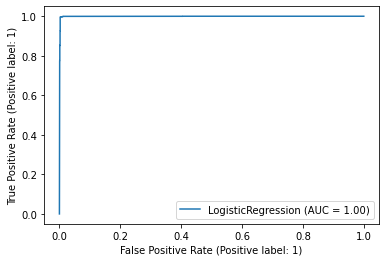

In [91]:
rcv = RandomizedSearchCV(model_LR, params_LR, cv=5, scoring='neg_log_loss', n_jobs=-1, verbose=1, random_state=23)
rcv.fit(X[X_num_train], y)

rcv_best = rcv.best_estimator_
print('\n')
print('best estimator : ', rcv_best)
print('best parameters: ', rcv.best_params_)
print('best score: ', rcv.best_score_)
print('\n')

y_train_prob = rcv_best.predict_proba(X[X_num_train])
y_train_pred = rcv_best.predict(X[X_num_train])
y_test_prob = rcv_best.predict_proba(X_test[cols_num_X_test])
y_test_pred = rcv_best.predict(X_test[cols_num_X_test])

matrix_train = confusion_matrix(y, y_train_pred)
# matrix_val = confusion_matrix(y_val, y_val_pred)
report_train = classification_report(y, y_train_pred)
# report_val = classification_report(y_val, y_val_pred)
auc_train = roc_auc_score(y, y_train_prob[:,1])
# auc_val = roc_auc_score(y_val, y_val_prob[:,1])
logloss_train = log_loss(y, y_train_prob[:,1])
# logloss_val = log_loss(y_val, y_val_prob[:,1])

print('Confusion Matrix for train')
print('='*60)
print(matrix_train,"\n")
# print('Confusion Matrix for val')
# print('='*60)
# print(matrix_val,"\n")
print('Classification Report for train')
print('='*60)
print(report_train,"\n")
# print('Classification Report for val')
# print('='*60)
# print(report_val,"\n")
print('AUC-ROC for train')
print('='*60)
print(auc_train,'\n')
# print('AUC-ROC for val')
# print('='*60)
# print(auc_val,'\n')
print('Roc-Auc-Curve for Train set')
print('='*60)
print(plot_roc_curve(rcv_best, X[X_num_train], y),'\n')
# print('Roc-Auc-Curve for Val set')
# print('='*60)
# print(plot_roc_curve(rcv_best, X_val, y_val),'\n')
print('Log-Loss for Train set')
print('='*60)
print(logloss_train,'\n')
# print('Log-Loss for Val set')
# print('='*60)
# print(logloss_val,'\n')

### Predicting test target data

In [92]:
y_test_pred = rcv_best.predict(X_test[cols_num_X_test])
y_test_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [93]:
submission_df = pd.DataFrame(y_test_pred,columns=["Outcome"])
submission_df

,Outcome
0,1
1,1
2,0
3,1
4,0
...,...
4003,1
4004,0
4005,1
4006,1


In [94]:
submission_df.value_counts()

Outcome
1          2698
0          1310
dtype: int64

In [95]:
preds = rcv_best.predict_proba(X_test[cols_num_X_test])
submission_df['Outcome'] = [pred[1] for pred in preds]

### Submitting final data

In [96]:
submission_df.to_csv('my_submission_file3.csv', index=False)
submission_df

,Outcome
0,1.00
1,1.00
2,0.00
3,0.99
4,0.00
...,...
4003,0.66
4004,0.35
4005,1.00
4006,1.00
